# Assignment 4. Exercise 3.1. Comparison of DR Techniques

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets.samples_generator import make_blobs
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances

In [36]:
data1 = pd.read_csv('breast_cancer.csv',names=range(10))
data2 = pd.read_csv('en_tweet_label.csv')
data3 = pd.read_csv('sv_tweet_label.csv')

In [37]:
X1 = data1.iloc[:500,:]
X2 = data2.iloc[:500,:]
X3 = data3.iloc[:500,:]

In [38]:
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

In [39]:
def sammon(X, max_iter,threshold ,lr):
    np.seterr(divide='ignore', invalid='ignore')
   
    x = X
    y = np.random.normal(1,5,[x.shape[0],2])
    
    handle_inf = lambda x: 100 if np.isinf(x) else x
    handle_nan = lambda x: 0 if np.isnan(x) else x
    
    diss_x = euclidean_distances(X, X)
   
    for n_iter in range(max_iter):
        
        diss_y = euclidean_distances(y, y)
        
        e0 = 1/(diss_x.sum()/2)
        e1 = (diss_y - diss_x)**2
        e2 = diss_x
        e3 = e1/e2
        e3[np.isinf(e3)] = 100
        e3[np.isnan(e3)] = 0
        
        E = e0 * (e3.sum())/2
        
        if E<threshold:
            break
        
        for i in range(y.shape[0]):
    
            delta0 = np.zeros(y.shape[1])
            delta1 = np.zeros(y.shape[1])

            for j in range(y.shape[0]):
                if i == j :
                    continue
            
                diff_xy = (diss_x[i,j] - diss_y[i,j])
                mult_xy = (diss_x[i,j] * diss_y[i,j])
                
                delta0_0 = diff_xy/mult_xy
                delta0_0 = handle_inf(delta0_0)
                delta0_0 = handle_nan(delta0_0)
            
                delta0 = delta0 + delta0_0*(y[i]-y[j])
                
                delta1_0 = diff_xy/diss_y[i,j]
                delta1_0 = handle_inf(delta1_0)
                delta1_0 = handle_nan(delta1_0)
                
                delta1_1 = 1 + delta1_0

                
                delta1_2 = (y[i]-y[j])**2/diss_y[i,j]
                delta1_2[np.isinf(delta1_2)] = 100
                delta1_2[np.isnan(delta1_2)] = 0
                

                delta1_3 = 1/mult_xy
                delta1_3 = handle_inf(delta1_3)
                delta1_3 = handle_nan(delta1_3)
                
                delta1 = delta1 + (delta1_3 * (diff_xy - delta1_2 * delta1_1))


            delta = delta0/np.absolute(delta1)
            y[i] = y[i] - lr * delta
         
    return y

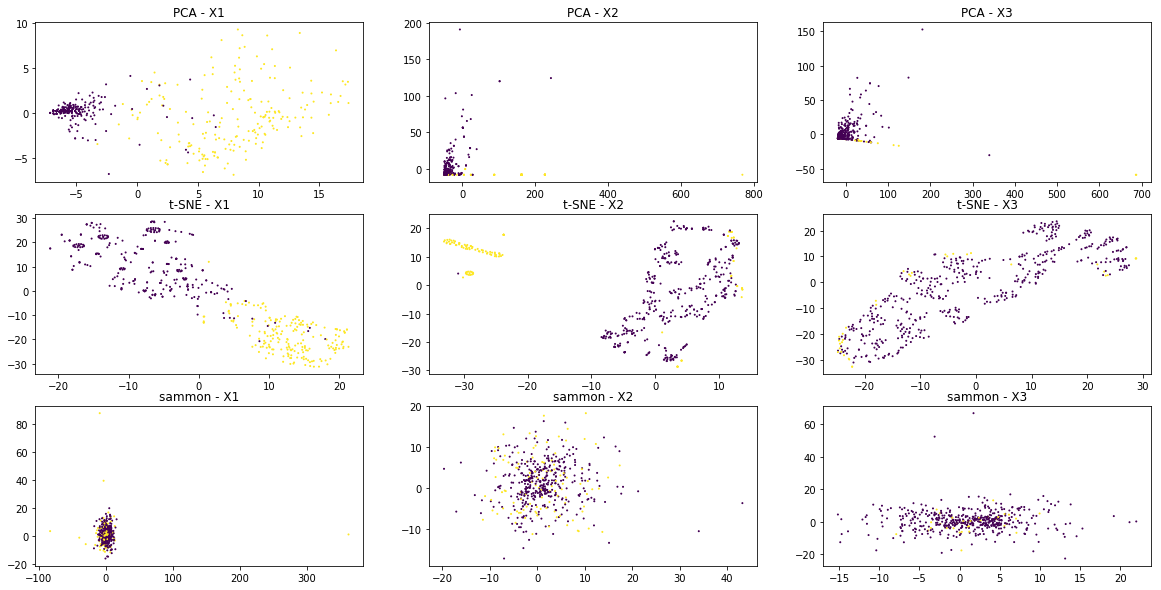

In [40]:
plt.figure(figsize=(20, 10))


#********************************* pca

plt.subplot(3,3, 1)
plt.title('PCA - X1')
pca_y = pca.fit_transform(X1)
plt.scatter(pca_y[:,0], pca_y[:,1], s=1, c=X1[9])

plt.subplot(3,3, 2)
plt.title('PCA - X2')
pca_y = pca.fit_transform(X2)
plt.scatter(pca_y[:,0], pca_y[:,1], s=1, c=X2['label'])

plt.subplot(3,3, 3)
plt.title('PCA - X3')
pca_y = pca.fit_transform(X3)
plt.scatter(pca_y[:,0], pca_y[:,1], s=1, c=X3['label'])

#********************************* t-SNE
plt.subplot(3,3, 4)
plt.title('t-SNE - X1')
ts_y = tsne.fit_transform(X1)
plt.scatter(ts_y[:,0], ts_y[:,1], s=1, c=X1[9])

plt.subplot(3,3, 5)
plt.title('t-SNE - X2')
ts_y = tsne.fit_transform(X2)
plt.scatter(ts_y[:,0], ts_y[:,1], s=1, c=X2['label'])

plt.subplot(3,3, 6)
plt.title('t-SNE - X3')
ts_y = tsne.fit_transform(X3)
plt.scatter(ts_y[:,0], ts_y[:,1], s=1, c=X3['label'])

#********************************* sammon
plt.subplot(3,3, 7)
plt.title('sammon - X1')
sa_y = sammon(X1, 10,0.3, 0.03)
plt.scatter(sa_y[:,0], sa_y[:,1], s=1, c=X1[9])

plt.subplot(3,3, 8)
plt.title('sammon - X2')
sa_y = sammon(X2, 10,0.3, 0.03)
plt.scatter(sa_y[:,0], sa_y[:,1], s=1, c=X2['label'])

plt.subplot(3,3, 9)
plt.title('sammon - X3')
sa_y = sammon(X3, 10,0.3, 0.03)
plt.scatter(sa_y[:,0], sa_y[:,1], s=1, c=X3['label'])


plt.show()

NOTE: In Assignment4.Exercise3 I focus mainly on two datasets from Nordic Tweet Stream NTS [1] corpuw which are related to my thesis. I used three datasets of: (1) 637 breast cancer dataSet (2) 1000 English tweets and (3) 1000 Swedish tweets. 
Each tweet presented by 9 properties:        tweet_id,isReply,isRetweet,accountReputation,hashtagDensity,urlDensity,mentionDensity,tweetsPerDay,favoritesPerDay,deviceType, label.
they classified as autogenerated AGT or Human generated as HGT. 
They labeled manually by some experts.
If you need more info about it, feel free to let me know, I can send more Info about them.

As it is illustrated on figure, PCA with two components definitely hold some information, and It seems clearly enough to set all of them apart.
However, PCA mainly focuses on preserving the distances between widely separated datapoints rather than on preserving the distances between nearby datapoints, Specially in Tweet datasets.

Sammon mapping attempts to address this problems, It produce solutions in which there are large overlaps between the different classes.

The main weakness of the Sammon cost function is that the importance of retaining small pairwise distances in the map is largely dependent on small differences in these pairwise distances. In particular, a small error in the model of two high-dimensional points that are extremely close together. Since all small pairwise distances constitute the local structure of the data, it seems more appropriate to aim to assign approximately equal importance to all small pairwise distances [2].

In contrast, t-SNE constructs a map in which the separation between the classes is almost perfect.

The results reveal the strong performance of t-SNE compared to the other techniques, in all data sets. Moreover, The map constructed by t-SNE is significantly better, since it models many of the members of each class fairly close together.

For English dataSet (X2), t-SNE approximately represents the one-dimensional manifold of viewpoints as a line (yellow AGT tweets in up-left of the t-SNE map).

Although, I guess It was expected since t-SNE in contrary to PCA is not a mathematical technique but a probablistic one.

It worth to mention that, since in all three dataset are binarry classification, I can not see any point to state how easier some classes are to seperate that others. I hope that it would be alright.

### References 

[1]J. Lundberg, J. Nordqvist, and A. Matosevic, “On-the-fly Detection of Autogenerated Tweets,” 2018.

[2] L. van der Maaten and G. Hinton, "Visualizing Data using t-SNE", Journal of Machine Learning Research 9 (2008). http://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf